In [1]:
import warnings
warnings.filterwarnings("always")

In [2]:
import pandas as pd
import numpy as np
import scipy.stats

/home/minnie/.pyenv/versions/3.6.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/minnie/.pyenv/versions/3.6.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/minnie/.pyenv/versions/3.6.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/minnie/.pyenv/versions/3.6.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/minnie/.pyenv/versions/3.6.6/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  ret

/home/minnie/.pyenv/versions/3.6.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/minnie/.pyenv/versions/3.6.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/minnie/.pyenv/versions/3.6.6/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/home/minnie/.pyenv/versions/3.6.6/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/home/minnie/.pyenv/versions/3.6.6/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __

In [3]:
from column_categories import *

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

/home/minnie/.pyenv/versions/3.6.6/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/home/minnie/.pyenv/versions/3.6.6/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


In [37]:
train_df = pd.read_csv('../input/train.csv')
train_df.set_index([household_id, individual_id], inplace=True)
train_df.head()

v2a1  hacdor  rooms  hacapo  v14a  refrig  v18q  \
idhogar   Id                                                                  
21eb7fcc1 ID_279628684  190000.0       0      3       0     1       1     0   
0e5d7a658 ID_f29eb3ddd  135000.0       0      4       0     1       1     1   
2c7317ea8 ID_68de51c94       NaN       0      8       0     1       1     0   
2b58d945f ID_d671db89c  180000.0       0      5       0     1       1     1   
          ID_d56d6f5f5  180000.0       0      5       0     1       1     1   

                        v18q1  r4h1  r4h2   ...    SQBescolari  SQBage  \
idhogar   Id                                ...                          
21eb7fcc1 ID_279628684    NaN     0     1   ...            100    1849   
0e5d7a658 ID_f29eb3ddd    1.0     0     1   ...            144    4489   
2c7317ea8 ID_68de51c94    NaN     0     0   ...            121    8464   
2b58d945f ID_d671db89c    1.0     0     2   ...             81     289   
          ID_d56d6f5f5    1.0     0     2   ...            121    1369   

                        SQBhogar_total  SQBedjefe  SQBhogar_nin  \
idhogar   Id                                                      
21eb7fcc1 ID_279628684               1        100             0   
0e5d7a658 ID_f29eb3ddd               1        144             0   
2c7317ea8 ID_68de51c94               1          0             0   
2b58d945f ID_d671db89c              16        121             4   
          ID_d56d6f5f5              16        121             4   

                        SQBovercrowding  SQBdependency  SQBmeaned  agesq  \
idhogar   Id                                                               
21eb7fcc1 ID_279628684         1.000000            0.0      100.0   1849   
0e5d7a658 ID_f29eb3ddd         1.000000           64.0      144.0   4489   
2c7317ea8 ID_68de51c94         0.250000           64.0      121.0   8464   
2b58d945f ID_d671db89c         1.777778            1.0      121.0    289   
          ID_d56d6f5f5         1.777778            1.0      121.0   1369   

                        Target  
idhogar   Id                    
21eb7fcc1 ID_279628684       4  
0e5d7a658 ID_f29eb3ddd       4  
2c7317ea8 ID_68de51c94       4  
2b58d945f ID_d671db89c       4  
          ID_d56d6f5f5       4  

[5 rows x 141 columns]

## Check for class imbalance

In [6]:
from column_categories import target_values
def target_table_breakdown(df, target_desc=target_values):
    household_target_sizes = df[target_column].value_counts().to_frame()
    household_target_sizes.columns = ['total']
    household_target_sizes['proportion'] = household_target_sizes['total']/household_target_sizes['total'].sum()
    household_target_sizes['target description'] = household_target_sizes.index.map(target_desc.get)
    return household_target_sizes

Based on individuals, how are the target values distributed?

In [7]:
target_table_breakdown(train_df)

,total,proportion,target description
4,5996,0.627394,non vulnerable households
2,1597,0.167103,moderate poverty
3,1209,0.126504,vulnerable households
1,755,0.079000,extreme poverty


Based on households, how are the target values distributed?

Before we can do this we need to decide how to group taget values in the case where they aren't consistent across the household.

#### Verify target values are consistent across households

In [8]:
is_target_consistent = train_df.groupby(household_id)[target_column].apply(lambda x: x.nunique() == 1)
inconsistent_targets = is_target_consistent[is_target_consistent != True]
print('There are %d households with inconsistent target values' % len(inconsistent_targets))

There are 85 households with inconsistent target values


In [9]:
train_df.loc[inconsistent_targets.index][[head_of_household,target_column]].head()

parentesco1  Target
idhogar   Id                               
4b6077882 ID_b1fb0180e            1       1
          ID_17d9dcd44            0       2
          ID_e78621924            0       2
6833ac5dc ID_2be4f2db1            0       2
          ID_1c3ec2768            0       2

The organizers say to update the household with the value stated by the head, but I think it should be the mode.

Use the following to get target from household head:

In [10]:
hh_target = pd.DataFrame(train_df[train_df[head_of_household] == 1][target_column] \
            .groupby(household_id).first().astype(int))
print(len(hh_target))

2973


There are cases where there is no head of household so some household targets are missing here.

Use the following to get target from mode of values given by individuals:

In [11]:
hh_target = pd.DataFrame(train_df[target_column].groupby(household_id).agg(lambda x: scipy.stats.mode(x)[0][0]))
print(len(hh_target))

2988


Make sure we're not overwriting with any null values, so remove cases where household targets are missing - this is needed for when we are taking the household head's target value as a truth. (I didn't think update works this way but for some reason it's overwriting existing values with null in the case where a household head is missing).

In [12]:
df = train_df[[target_column]].join(hh_target, lsuffix='_x')
df = df[~df[target_column].isnull()]
df.head()

Target_x  Target
idhogar   Id                            
21eb7fcc1 ID_279628684         4       4
0e5d7a658 ID_f29eb3ddd         4       4
2c7317ea8 ID_68de51c94         4       4
2b58d945f ID_d671db89c         4       4
          ID_d56d6f5f5         4       4

In [13]:
train_df.update(df[[target_column]])

In [14]:
is_target_consistent = df.groupby(household_id)[target_column].apply(lambda x: x.nunique() == 1)
inconsistent_targets = is_target_consistent[is_target_consistent != True]
print('There are %d households with inconsistent target values' % len(inconsistent_targets))

There are 0 households with inconsistent target values


In [15]:
target_table_breakdown(train_df.groupby(household_id).first())

,total,proportion,target description
4,1953,0.653614,non vulnerable households
2,455,0.152276,moderate poverty
3,366,0.122490,vulnerable households
1,214,0.071620,extreme poverty


We need to be aware of this imbalance when manipulating data.

## Ensure all features are numeric

Inspect data types, ensure all data is numeric

In [16]:
def get_column_dtypes(df):
    columns_by_dtype = df.columns.groupby(df.dtypes)
    return {k.name: v for k, v in columns_by_dtype.items()}

In [17]:
get_column_dtypes(train_df)

{'int64': Index(['hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q', 'r4h1', 'r4h2',
        'r4h3', 'r4m1',
        ...
        'area1', 'area2', 'age', 'SQBescolari', 'SQBage', 'SQBhogar_total',
        'SQBedjefe', 'SQBhogar_nin', 'agesq', 'Target'],
       dtype='object', length=130),
 'float64': Index(['v2a1', 'v18q1', 'rez_esc', 'meaneduc', 'overcrowding',
        'SQBovercrowding', 'SQBdependency', 'SQBmeaned'],
       dtype='object'),
 'object': Index(['dependency', 'edjefe', 'edjefa'], dtype='object')}

Convert `dependency`, `edjefe`, `edjefa` to numerics.

### Dependency

In [18]:
train_df['dependency'].value_counts().head()

yes    2192
no     1747
.5     1497
2       730
1.5     713
Name: dependency, dtype: int64

Mix of string/boolean and continuous floats

This feature is defined as:

- `dependency`: Dependency _rate_, calculated = (number of members of the household younger than 19 or older than 64)/(number of member of household between 19 and 64)

From the features available to us we can see this calculation is:
- `hogar_nin`+`hogar_mayor` / `hogar_adul`-`hogar_mayor`

This is related to `SQBdependency`, so we should check whether that feature needs to be updated too.

First lets look at the distribution of the numeric values we already have:

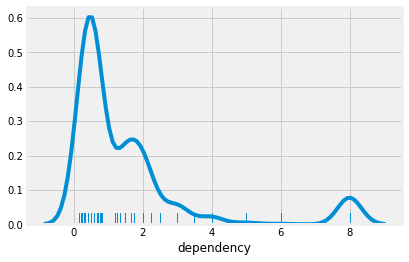

In [19]:
numeric_dep = train_df[(train_df['dependency']!='yes') & (train_df['dependency']!='no')]['dependency'].astype(float)
sns.distplot(numeric_dep, hist=False, rug=True)

There is a max cutoff value being used for the case where there are no adults between 19 and 64 (as it would cause division by zero). This is creating a peak at the value 8 which doesn't really exist. 

This suggests it would be good to mark household that have no adults to depend on as this may signal poverty level.

Let's calculate the rate ourselves. As there's an issue with division by zero for the case where there are no adults under 65, let's instead calculate the dependecy rate as the number of dependents proportional of the household size overall.

The original calculation also misses out on information about disabled adults - potentially adults who cannot work and are dependents on the household. We'll incorporate them into the dependency calculation.

In [20]:
adult_dis = pd.DataFrame(train_df[(train_df['dis']==1) & 
                                  (train_df['age']>=19) & 
                                  (train_df['age']<=64)].groupby(household_id).size()).rename(columns={0:'adult-dis'})
train_df = train_df.join(adult_dis).fillna(0)

In [21]:
train_df[train_df['adult-dis']>1][['adult-dis','age','dis']].head()

adult-dis  age  dis
idhogar   Id                               
c6e34ca8a ID_02f170a44        2.0   39    1
          ID_b6f426468        2.0   57    1
fd2369f80 ID_52f684208        2.0   51    0
          ID_15e54ec66        2.0   24    1
          ID_65b502c87        2.0   25    0

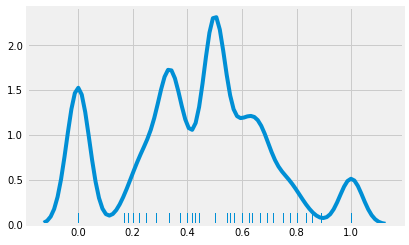

In [22]:
depedents = train_df['hogar_nin']+train_df['hogar_mayor']+train_df['adult-dis']

calculated_dep = depedents/train_df['hogar_total']

sns.distplot(calculated_dep, hist=False, rug=True)

We see a peak around 0 where households have no dependents, and a small peak at 1 where households have no adults to depend on. The distribution between 0.1 - 0.9 seems to be the true dependency rate we're looking for.

Let's add a couple of features to indicate this and also fix the dependency rate values.

In [23]:
train_df['0-adults'] = ((train_df['hogar_adul']-train_df['hogar_mayor']-train_df['adult-dis'])==0).astype(int)
train_df['0-dependents'] = ((train_df['hogar_nin']+train_df['hogar_mayor']+train_df['adult-dis'])==0).astype(int)
train_df['dependency'] = calculated_dep
train_df['SQBdependency'] = train_df['dependency']**2 

In [24]:
train_df[['0-adults','0-dependents','dependency','SQBdependency']].head()

0-adults  0-dependents  dependency  SQBdependency
idhogar   Id                                                             
21eb7fcc1 ID_279628684         0             1         0.0           0.00
0e5d7a658 ID_f29eb3ddd         1             0         1.0           1.00
2c7317ea8 ID_68de51c94         1             0         1.0           1.00
2b58d945f ID_d671db89c         0             0         0.5           0.25
          ID_d56d6f5f5         0             0         0.5           0.25

In [25]:
'%d rows are missing a value' % len(train_df[train_df['dependency'].isnull()])

'0 rows are missing a value'

### EdjeFe & EdjeFa

`edjefe` and `edjefa` represent the years of education of male or female head of household respectively. This value is based on the interaction of `escolari` (years of education), head of household, and gender and the documentation states that yes=1 and no=0. Let's double check that we can replace strings with binary values.

Feature definitions:
 - `escolari` represents the number of years in education
 - `instlevel#` represents the level of education reached (there are 9 binary values, let's compress them into a single column). We can check level of education against number of years in education for consistency.

In [26]:
def compress_columns(df, new_col, old_cols):
    df[new_col] = (np.argmax(np.array(df[old_cols]), axis = 1))
    return df

In [27]:
df = compress_columns(train_df, 'education-level', ['instlevel1', 'instlevel2', 'instlevel3', 'instlevel6', 'instlevel4', 'instlevel7', 'instlevel5', 'instlevel8', 'instlevel9'])
df['education-level'].head()

idhogar    Id          
21eb7fcc1  ID_279628684    4
0e5d7a658  ID_f29eb3ddd    7
2c7317ea8  ID_68de51c94    6
2b58d945f  ID_d671db89c    4
           ID_d56d6f5f5    6
Name: education-level, dtype: int64

Now we can check both the number of years of education and the level of education reached in the cases where `edjefe` or `edjefa` are 'yes' to verify that the value should be set to 1.

In [28]:
cols = ['education-level','escolari','edjefe','edjefa','male','female']
head_educ = df[(df[head_of_household]==1) & ((df['edjefe']=='yes') | (df['edjefa']=='yes'))][cols]
head_educ.head()

,,education-level,escolari,edjefe,edjefa,male,female
idhogar,Id,,,,,,
39f697073,ID_1b32caf34,1,1,no,yes,0,1
5f1665f1d,ID_f23811c6b,1,1,no,yes,0,1
10949c36b,ID_68ec000c5,1,1,no,yes,0,1
3641ce2d1,ID_3ffc11a03,1,1,yes,no,1,0
4ec0576ea,ID_2d7e7d8d1,1,1,no,yes,0,1


It looks like this is correct, the 'yes' values should be set to 1. Before updating let's double check for any cases where the years of education or education-level is greater than 1.

In [29]:
len(head_educ[head_educ['escolari']>1])

0

In [30]:
len(head_educ[head_educ['education-level']>1]) # (1 = incomplete primary school, expected)

0

This is consistent. In all cases where the head of household education value is set to `yes` the education level and years is `1`. Let's replace.

In [31]:
def convert_to_binary(df, feature):
    df[feature].replace('no','0',inplace=True)
    df[feature].replace('yes','1',inplace=True)
    df[feature] = df[feature].astype(int)
    return df

In [32]:
train_df = convert_to_binary(train_df, 'edjefe')
train_df = convert_to_binary(train_df, 'edjefa')

There also exists `SQBedjefe` - let's check this is consistent by seeing if there are any instances where `edjefe` squared does not match this value.

In [33]:
len(train_df[train_df['SQBedjefe']!=train_df['edjefe']**2])

0

Let's add the equivalent for female head-of-household's for consistency. We'll check later whether this is a helpful feature.

In [34]:
train_df['SQBedjefa']=train_df['edjefa']**2

Other potentially helpful features that capture parts of this information could be:
 - is the head of household male/female
 - how many years of education does the head-of-household have (regardless of gender)
 - how many years of education do males in the household have / females in the household have (perhaps only adults)
 - what level of education does the h-o-h have?
 - what level of eduacation do males in the household have / females in the household have

This is a lot to add, we'll make note now and add them later.

### Verify all values are numeric

In [35]:
get_column_dtypes(train_df)

{'int64': Index(['hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q', 'r4h1', 'r4h2',
        'r4h3', 'r4m1',
        ...
        'SQBage', 'SQBhogar_total', 'SQBedjefe', 'SQBhogar_nin', 'agesq',
        'Target', '0-adults', '0-dependents', 'education-level', 'SQBedjefa'],
       dtype='object', length=136),
 'float64': Index(['v2a1', 'v18q1', 'rez_esc', 'dependency', 'meaneduc', 'overcrowding',
        'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'adult-dis'],
       dtype='object')}

All values are now numeric

## Fill in missing values

In [49]:
nulls = train_df.isnull().sum(axis=0)
nulls[nulls!=0]/len(train_df)

meaneduc     0.000523
SQBmeaned    0.000523
dtype: float64

Feature definitions for missing features:
- `v2a1` : Monthly rent payment
- `v18q1` : Number of tablets household owns
- `rez_esc` : Years behind in school
- `meaneduc` : Average years of education for adults (18+)
- `SQBmeaned` : Average years of education for adults (18+) squared

### Fill in values for monthly rent payment

In [39]:
cols = ['v2a1','tipovivi1','tipovivi2','tipovivi3','tipovivi4','tipovivi5']
train_df[cols].head()

v2a1  tipovivi1  tipovivi2  tipovivi3  tipovivi4  \
idhogar   Id                                                                   
21eb7fcc1 ID_279628684  190000.0          0          0          1          0   
0e5d7a658 ID_f29eb3ddd  135000.0          0          0          1          0   
2c7317ea8 ID_68de51c94       NaN          1          0          0          0   
2b58d945f ID_d671db89c  180000.0          0          0          1          0   
          ID_d56d6f5f5  180000.0          0          0          1          0   

                        tipovivi5  
idhogar   Id                       
21eb7fcc1 ID_279628684          0  
0e5d7a658 ID_f29eb3ddd          0  
2c7317ea8 ID_68de51c94          0  
2b58d945f ID_d671db89c          0  
          ID_d56d6f5f5          0

Rent is only owed in the case where the household are renting or paying installments, i.e. `tipovivi2` or `tipovivi3` is marked as 1. Let's check whether there are any missing values for this case.

In [40]:
len(train_df[((train_df['tipovivi2']==1) | (train_df['tipovivi3']==1)) & (train_df['v2a1'].isnull())])

0

In all cases where we expect to see values for monthly payments, the payments are present. We can set missing values to 0. We can also add a marker to show whether a household makes monthly payments for their accomodation, and compress the binary columns that indicate the stability of their accomodation.

In [41]:
train_df['v2a1'] = train_df['v2a1'].fillna(0)
train_df['owes-montly-payments'] = ((train_df['tipovivi2']==1) | (train_df['tipovivi3']==1)).astype(int)
train_df = compress_columns(train_df, 'residence-stability', ['tipovivi5','tipovivi4','tipovivi3','tipovivi2','tipovivi1'])

### Fill in values for number of tablets a household owns

First let's check what kind of values we're looking at:

In [42]:
train_df['v18q1'].value_counts()

1.0    1586
2.0     444
3.0     129
4.0      37
5.0      13
6.0       6
Name: v18q1, dtype: int64

We have another feature that represents at an individual's level whether or not they own a tablet. We can sum this for each household to generate the missing values.

In [43]:
tablets = pd.DataFrame(train_df.groupby(household_id)['v18q'].sum()).rename(columns={'v18q':'v18q1'})

It looked like some existing values for this feature were wrong so we'll drop the column and completely replace it with the generated value.

In [44]:
train_df = train_df.drop(columns=['v18q1']).join(tablets['v18q1'])
train_df[['v18q','v18q1']].head(7)

v18q  v18q1
idhogar   Id                       
21eb7fcc1 ID_279628684     0      0
0e5d7a658 ID_f29eb3ddd     1      1
2c7317ea8 ID_68de51c94     0      0
2b58d945f ID_d671db89c     1      4
          ID_d56d6f5f5     1      4
          ID_ec05b1a7b     1      4
          ID_e9e0c1100     1      4

### Fill in missing school years

School starts age 7 so the value for `escolari` should be only 7 years less than a persons age (up until the age of 18).

In [45]:
tmp = train_df.copy()
tmp['age'] = train_df['age'].apply(lambda x: min(x, 18))
tmp['gap'] = (tmp['age']-tmp['escolari']-7).apply(lambda x: max(x, 0))

In [46]:
columns = ['rez_esc', 'gap']
tmp[~tmp['rez_esc'].isnull()][columns].head()

rez_esc  gap
idhogar   Id                        
2b58d945f ID_d671db89c      1.0    1
          ID_e9e0c1100      0.0    0
d6dae86b7 ID_3e04e571e      0.0    0
          ID_db44f5c59      1.0    1
cbf24a06c ID_0f01e18e9      0.0    0

This calculation seems to work so let's generate values for this feature.

In [47]:
train_df['rez_esc'] = (train_df['age'].apply(lambda x: min(x, 18)) -tmp['escolari']-7).apply(lambda x: max(x, 0))

### Fill in mean education values

`meaneduc` represents mean years of education for members of household that are 18+

Let's have a look at the case where we're missing values:

In [48]:
cols = ['hogar_total','hogar_adul','hogar_nin','hogar_mayor','age','escolari','meaneduc']
train_df[train_df['meaneduc'].isnull()][cols]

hogar_total  hogar_adul  hogar_nin  hogar_mayor  age  \
idhogar   Id                                                                   
1b31fd159 ID_bd8e11b0f            1           0          1            0   18   
a874b7ce7 ID_46ff87316            2           0          2            0   18   
          ID_69f50bf3e            2           0          2            0   18   
faaebf71a ID_db3168f9f            2           0          2            0   19   
          ID_2a7615902            2           0          2            0   19   

                        escolari  meaneduc  
idhogar   Id                                
1b31fd159 ID_bd8e11b0f        10       NaN  
a874b7ce7 ID_46ff87316         6       NaN  
          ID_69f50bf3e         4       NaN  
faaebf71a ID_db3168f9f        12       NaN  
          ID_2a7615902        12       NaN

We can calculate the mean education level of adults of 18 and over using the individual's feature representing their years of schooling and group by household. Let's generate this value and compare it to existing values to verify it's the correct approach.

In [50]:
tmp1 = pd.DataFrame(train_df[train_df['age']>=18]['escolari'].groupby(household_id).mean().round(4))
tmp2 = pd.DataFrame(train_df['meaneduc'].groupby(household_id).first().round(4))
tmp3 = pd.DataFrame(train_df['SQBmeaned'].groupby(household_id).first().round(4))
adult_educ = tmp1.join(tmp2).join(tmp3)
adult_educ['sq'] = adult_educ['escolari']**2
adult_educ.head()

,escolari,meaneduc,SQBmeaned,sq
idhogar,,,,
001ff74ca,16.0,16.0,256.00,256.00
003123ec2,6.5,6.5,42.25,42.25
004616164,3.0,3.0,9.00,9.00
004983866,8.0,8.0,64.00,64.00
005905417,9.0,9.0,81.00,81.00


Now create a DataFrame of replacement values where `meaneduc` is null.

In [51]:
replacements = adult_educ[adult_educ['meaneduc'].isnull()] \
    .drop(columns=['meaneduc','SQBmeaned']) \
    .rename(columns={'escolari':'meaneduc','sq':'SQBmeaned'})
replacements

,meaneduc,SQBmeaned
idhogar,,
1b31fd159,10.0,100.0
a874b7ce7,5.0,25.0
faaebf71a,12.0,144.0


Fill in missing values for `meaneduc` and `SQBmeaned`:

In [52]:
train_df = train_df.fillna(replacements)

Verify there are no more missing values

In [53]:
nulls = train_df.isnull().sum(axis=0)
nulls[nulls!=0]/len(train_df)

Series([], dtype: float64)

## Add some features that may be useful

#### Supporters of household

Let's add a bunch of features that encapsulate information about education and gender of adults in the household, we can filter out ones that aren't useful later.

In [ ]:
hoh = train_df[(train_df[head_of_household]==1)].groupby(household_id).first()

male_hoh = pd.DataFrame((hoh['male']==1).astype(int)).rename(columns={'male':'male-hoh'})
ed_yrs_hoh = pd.DataFrame(hoh['escolari']).rename(columns={'escolari':'hoh-ed-years'})
ed_lev_hoh = pd.DataFrame(hoh['education-level']).rename(columns={'education-level':'hoh-ed-level'})
hoh_sup = pd.DataFrame(((hoh['age']>=18) & (hoh['age']<=64) & (hoh['dis']==0)).astype(int)).rename(columns={0:'hoh-sup'})

In [ ]:
count_hoh = train_df[head_of_household].groupby(household_id).sum()
no_hoh = pd.DataFrame((count_hoh<1).astype(int)).rename(columns={head_of_household:'no-hoh'})

In [ ]:
supporters = train_df[(train_df['age']>=18) & (train_df['age']<=64) & (train_df['dis']==0)]
dependents = train_df[(train_df['age']<=18) & (train_df['age']>=64) & (train_df['dis']==1)]

num_supporters = pd.DataFrame(supporters.groupby(household_id).size()).rename(columns={0:'supporters'})
num_dependents = pd.DataFrame(supporters.groupby(household_id).size()).rename(columns={0:'dependents'})

support_males = supporters[supporters['male']==1] 
support_females = supporters[supporters['female']==1] 

num_support_males = pd.DataFrame(support_males.groupby(household_id).size()).rename(columns={0:'m-sups'})
num_support_females = pd.DataFrame(support_females.groupby(household_id).size()).rename(columns={0:'f-sups'})

meaneduc_m = pd.DataFrame(support_males['escolari'].groupby(household_id).mean().round(2)).rename(columns={'escolari':'meaneduc-m'})
meaneduc_f = pd.DataFrame(support_females['escolari'].groupby(household_id).mean().round(2)).rename(columns={'escolari':'meaneduc-f'})

ed_lev_ad_m = pd.DataFrame(support_males['education-level'].groupby(household_id).mean().round(2)).rename(columns={'education-level':'ed-lev-ad-m'})
ed_lev_ad_f = pd.DataFrame(support_females['education-level'].groupby(household_id).mean().round(2)).rename(columns={'education-level':'ed-lev-ad-f'})

In [ ]:
ed_lev_ad = pd.DataFrame(supporters['education-level'].groupby(household_id).mean().round(2)).rename(columns={'education-level':'ed-lev-ad'})

In [ ]:
additional_features = [
    male_hoh, no_hoh, hoh_sup,
    ed_yrs_hoh, ed_lev_hoh,
    num_supporters, num_dependents,
    num_support_males, num_support_females,
    meaneduc_m, meaneduc_f,
    ed_lev_ad_m, ed_lev_ad_f,
    ed_lev_ad
]

def recursive_join(dfs, df=None):
    if df is None:
        df = dfs.pop()
    if dfs:
        df = df.join(dfs.pop())
        df = recursive_join(dfs, df)
    return df

train_df = train_df.join(recursive_join(additional_features).fillna(0))
train_df.head()

In [ ]:
(train_df['r4t1']/train_df['supporters']).fillna(1)

We now have the following collection of information that can tell us a lot about the people supporting the household - the working age adults. Factors that may affect their pay at work are their level of education, their gender, their age, and information about who is the head of household may also have some affect. Here are the descriptions for both the original and new features encapsulating this:

In [ ]:
from column_categories import support_info, column_descriptions
print('\n'.join([' : '.join([f,column_descriptions.get(f)]) for f in support_info]))

## Reduce features about individuals

Values that may be useful when summed at household level:

In [ ]:
hh_sums = ['dis', 'male', 'female', 'estadocivil1', 'estadocivil2', 'estadocivil3', 'estadocivil4', \
           'estadocivil5', 'estadocivil6', 'estadocivil7', 'parentesco1', 'parentesco2', 'parentesco3', \
           'parentesco4', 'parentesco5', 'parentesco6', 'parentesco7', 'parentesco8', 'parentesco9', \
           'parentesco10', 'parentesco11', 'parentesco12', 'instlevel1', 'instlevel2', 'instlevel3', \
           'instlevel4', 'instlevel5', 'instlevel6', 'instlevel7', 'instlevel8', 'instlevel9', \
           'v18q','mobilephone']

Values that may be useful to get mean values for at household level:

In [ ]:
hh_means = ['escolari', 'rez_esc', 'education-level', 'age', 'SQBescolari', 'SQBage']

#### Summed or proportional values

In [ ]:
summed = train_df[hh_sums].groupby(household_id).apply(lambda x: (x.sum()/len(x)).round(2))
summed.head()

#### Mean values

In [ ]:
meaned = train_df[hh_means].groupby(household_id).mean()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scalars={}
def normalise(x):
    sc = scalars.get(x.name)
    if sc is None:
        sc = MinMaxScaler()
        scalars[x.name] = sc
        return (sc.fit_transform(x[:,np.newaxis]).round(4).ravel())
    else:
        return (sc.transform(x[:,np.newaxis]).round(4).ravel())
    
meaned = meaned.apply(lambda x: normalise(x), axis=0)
meaned.head()

#### Filter values with low variance across targets

Filter out features that don't vary much across target values:

In [ ]:
from sklearn.feature_selection import VarianceThreshold

def format_selector(selector, data, target):
    selector.fit(data, target)
    features = selector.get_support(indices = True)  # Returns array of indexes of nonremoved features
    features = data[[data.columns.values[i] for i in features]]
    return features

In [ ]:
import seaborn as sns
sns.set()

def proportions(df):
    for col in df:
        df[col] =  df[col]/df[col].sum()
    return df

def plot_breakdowns(X, y, features):
    df = X[features].join(y)
    if len(features)==1:
        value = features[0]
        desc['no '+value] = ''
        df['no '+value] = (~df[value].astype('bool')).astype('int')
    summed = df.groupby(target_column).sum()
    features_breakdown = proportions(summed.T).T
    features_breakdown.plot(kind='line', figsize=(12,6)).legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., prop={'size':14})
    return features_breakdown

In [ ]:
X = summed.join(meaned)
y = train_df.groupby(household_id)[target_column].first()

sel = VarianceThreshold(threshold=(.95 * (1 - .95)))
reduced_df = format_selector(sel, X, y)

print([c for c in reduced_df.columns])

It's not clear what each of these features mean so let's look them up from a dictionary I've generated from the kaggle info online.

In [ ]:
from column_categories import column_descriptions
[' : '.join([f, column_descriptions.get(f)]) for f in reduced_df.columns]

In [ ]:
plot_breakdowns(X, y, [c for c in reduced_df.columns])

These features seem best at indicating whether a household is at the rich end of the scale or not, but does little to distinguish the 3 lower categories.

### DataFrame with most iteresting values accumulated

In [ ]:
ind_var = summed.join(meaned)[['male', 'female', 'estadocivil2', 'estadocivil3', 'estadocivil7', 'parentesco1', \
                               'parentesco3', 'instlevel2', 'instlevel3', 'instlevel4', 'instlevel8', 'v18q', \
                               'rez_esc', 'education-level']]
ind_var.head()

## Reduce features about households

### Compress binary features

In [ ]:
def compress_columns(df, new_col, old_cols):
    col_idx = np.insert(df[old_cols].values, 0, 0, axis=1) # insert a 0 at beginning for case where value is missing
    df[new_col] = np.argmax(col_idx, axis = 1)
    df[new_col].fillna(0)
    df = df.drop(columns = old_cols)
    return df

Check cases where data on electricty is missing

In [ ]:
electricity = train_df[['noelec', 'coopele', 'public', 'planpri']]
electricity[electricity.sum(axis=1)<1].join(y).head()

In [ ]:
train_df = compress_columns(train_df, 'electricity', ['noelec', 'coopele', 'public', 'planpri'])
train_df = compress_columns(train_df, 'wall-quality', ['epared1', 'epared2', 'epared3'])
train_df = compress_columns(train_df, 'roof-quality', ['etecho1', 'etecho2', 'etecho3'])
train_df = compress_columns(train_df, 'floor-quality', ['eviv1', 'eviv2', 'eviv3'])
train_df = compress_columns(train_df, 'wall-material', ['paredfibras', 'pareddes', 'paredzinc', 'paredzocalo', 'paredmad', 'paredpreb', 'paredblolad', 'paredother'])
train_df = compress_columns(train_df, 'roof-material', ['techocane', 'techoentrepiso', 'techozinc', 'techootro'])
train_df = compress_columns(train_df, 'floor-material', ['pisonotiene', 'pisonatur', 'pisomadera', 'pisocemento', 'pisomoscer', 'pisoother'])
train_df = compress_columns(train_df, 'cooking-energy', ['energcocinar1', 'energcocinar2', 'energcocinar3', 'energcocinar4'])
train_df = compress_columns(train_df, 'toilet-system', ['sanitario1', 'sanitario5', 'sanitario3', 'sanitario2', 'sanitario6'])
train_df = compress_columns(train_df, 'rubbish-disposal', ['elimbasu3', 'elimbasu2', 'elimbasu5', 'elimbasu1', 'elimbasu4', 'elimbasu6'])
train_df = compress_columns(train_df, 'water-provision', ['abastaguano', 'abastaguafuera','abastaguadentro'])
train_df = compress_columns(train_df, 'house-ownership', ['tipovivi4', 'tipovivi5', 'tipovivi1', 'tipovivi3', 'tipovivi2'])
train_df = compress_columns(train_df, 'area', ['area1', 'area2'])

In [ ]:
train_df[train_df.columns[:20]]